In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [5]:
playstore = pd.read_csv("playstore-analysis (2) (1).csv")

In [7]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
playstore.shape

(10841, 13)

In [11]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [22]:
playstore.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [27]:
playstore.Rating.isnull().sum()

0

# b. Check the null values for the Android Ver column.
i. Are all 3 records having the same problem?

In [36]:
playstore.loc[playstore['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# ii.Drop the 3rd record i.e. record for “Life Made WIFI …”

In [40]:
playstore.drop([10472], inplace = True)

In [41]:
playstore.loc[playstore['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


# iii. Replace remaining missing values with the mode

In [43]:
playstore['Android Ver'].fillna(playstore['Android Ver'].mode()[0], inplace=True)

In [44]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# c. Current ver – replace with most common value

In [45]:
playstore['Current Ver'].fillna(playstore['Current Ver'].mode()[0], inplace=True)

# 2. Data clean up – correcting the data types

# a. Which all variables need to be brought to numeric types?

In [48]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
Reviews and installs need to be brought to numeric types.

# b. Price variable – remove $ sign and convert to float

In [49]:
price = []
for i in playstore['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i) 

# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [52]:
playstore.drop(labels=playstore[playstore['Price']=='Everyone'].index, inplace = True)
playstore['Price']= price
playstore['Price']= playstore['Price'].astype('float')

# d. Convert all other identified columns to numeric

In [54]:
playstore['Reviews']= playstore['Reviews'].astype('int')

# 3. Sanity checks – check for the following and handle accordingl

# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store

# i. Are there any such records? Drop if so.

In [55]:
playstore.loc[playstore.Rating < 1] & playstore.loc[playstore.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
There are no such records with rating less than 1 or greater than 5.

# b. Reviews should not be more than installs as only those who installed can review the 
app.
i. Are there any such records? Drop if so

In [ ]:
Yes, there are 7 records where Review is greater than Installs.

# 4. Identify and handle outliers – 
a. Price column
i. Make suitable plot to identify outliers in price

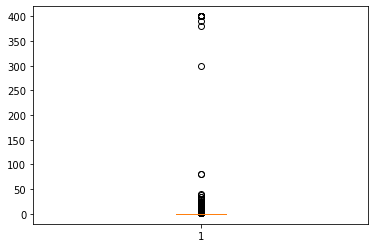

In [71]:
plt.boxplot(playstore['Price'])
plt.show()

# ii.Do you expect apps on the play store to cost $200? Check out these cases

In [72]:
print('Yes we can expect apps on the play store to cost $200')
playstore.loc[playstore['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


# iv. Limit data to records with price < $30

In [74]:
gt_30 = playstore[playstore['Price'] > 30].index
playstore.drop(labels=gt_30, inplace=True)

In [75]:
count = playstore.loc[playstore['Price'] > 30].index
count.value_counts().sum()

0

# iii. After dropping the useless records, make the suitable plot again to identify outliers

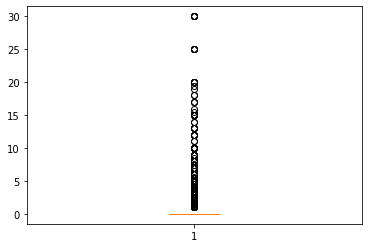

In [76]:
plt.boxplot(playstore['Price'])
plt.show()

# b. Reviews column
i. Make suitable plot

C:\Users\ourbe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


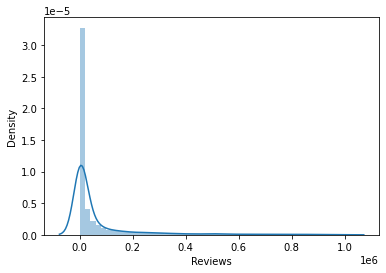

In [98]:
sns.distplot(playstore['Reviews'])
plt.show()

# ii. Limit data to apps with < 1 Million reviews

In [78]:
gt_1m = playstore[playstore['Reviews'] > 1000000 ].index
playstore.drop(labels = gt_1m, inplace=True)
print(gt_1m.value_counts().sum(),'cols dropped')

704 cols dropped


# c. Installs
i. What is the 95th percentile of the installs?

# ii.Drop records having a value more than the 95th percentile

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?¶
a. How do you explain this?

C:\Users\ourbe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


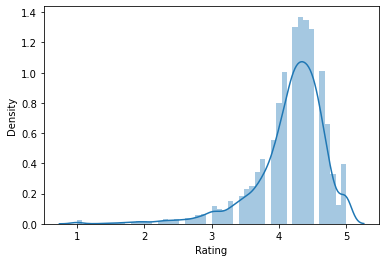

The skewness of this distribution is -1.7582337992433061
The Median of this distribution 4.3 is greater than mean 4.173104087067279 of this distribution


In [82]:
sns.distplot(playstore['Rating'])
plt.show()
print('The skewness of this distribution is',playstore['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(playstore.Rating.median(),playstore.Rating.mean()))

# b. What is the implication of this on your analysis?¶

In [83]:
playstore['Rating'].mode()

0    4.3
dtype: float64

# Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.

# 6. What are the top Content Rating values?¶


In [60]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [61]:
playstore['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

# everyone is top content rating values

# b. If yes, drop those as they won’t help in the analysis

In [63]:
#Replacing unwanted values with NaN
cr = []
for k in playstore['Content Rating']:
    cr.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

playstore['Content Rating']=cr

In [65]:
# Droping the NaN values.
temp2 = playstore[playstore["Content Rating"] == 'NaN'].index
playstore.drop(labels=temp2, inplace=True)
print('droped cols',temp2)

droped cols Int64Index([298, 3043, 6424, 8266], dtype='int64')


In [66]:
playstore['Content Rating'].value_counts() # Just  Check

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

# Task 7. Effect of size on rating¶


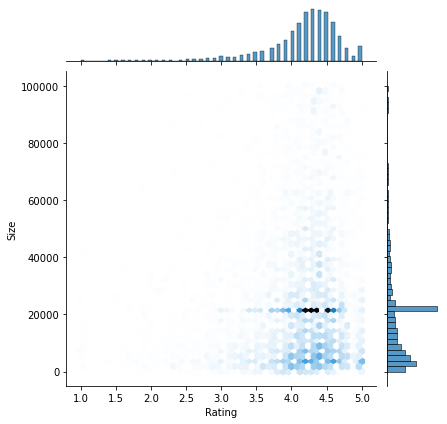

In [84]:
sns.jointplot(y ='Size', x ='Rating', data = playstore, kind ='hex')
plt.show()

# b. Do you see any patterns?
Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

# c. How do you explain the pattern?
Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

# Task 8. Effect of price on rating¶
a. Make a jointplot (with regression line)

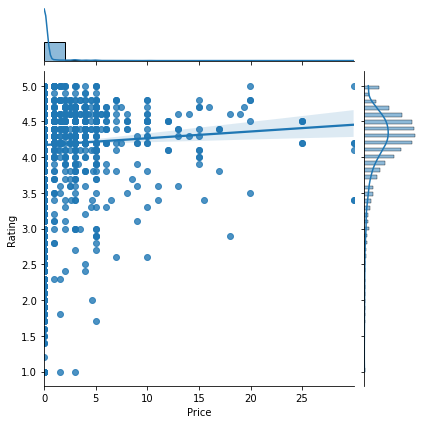

In [85]:
sns.jointplot(x='Price', y='Rating', data=playstore, kind='reg')
plt.show()

# b. What pattern do you see?
Generally on increasing the Price, Rating remains almost constant greater than 4.

# c. How do you explain the pattern?
Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [86]:
playstore.corr()

,Rating,Reviews,Size,Price
Rating,1.000000,0.147511,0.058260,0.030986
Reviews,0.147511,1.000000,0.188212,-0.075133
Size,0.058260,0.188212,1.000000,-0.001740
Price,0.030986,-0.075133,-0.001740,1.000000


# f. What is your overall inference on the effect of price on the rating
Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together –¶
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

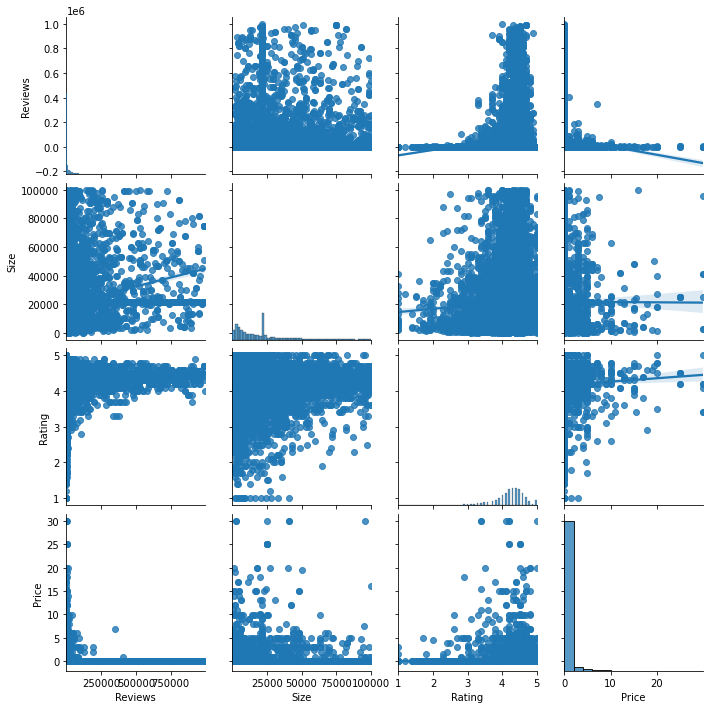

In [87]:
sns.pairplot(playstore, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# Task 10. Rating vs. content rating
a. Make a bar plot displaying the rating for each content rating

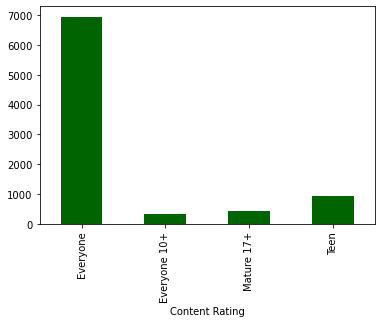

In [88]:
playstore.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

# b. Which metric would you use? Mean? Median? Some other quantile?
We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

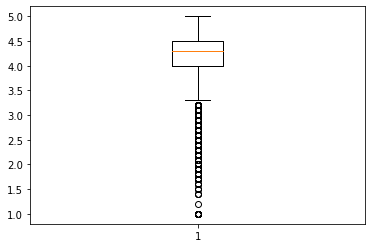

In [89]:
plt.boxplot(playstore['Rating'])
plt.show()

# c. Choose the right metric and plot¶

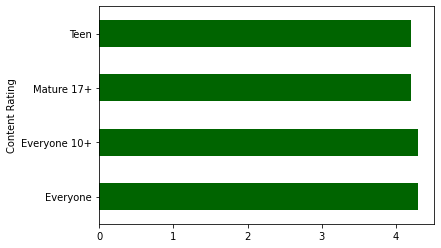

In [90]:
playstore.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

# Task 11. Content rating vs. size vs. rating – 3 variables at a time¶
a. Create 5 buckets (20% records in each) based on Size

In [93]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
playstore['Bucket Size'] = pd.cut(playstore['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(playstore, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.146870,4.247561,4.010582,4.184433
20k-40k,4.203967,4.166667,4.156291,4.173163
40k-60k,4.171457,4.265217,4.190476,4.242982
60k-80k,4.244221,4.280769,4.200000,4.273016
80k-100k,4.260127,4.304762,4.252632,4.269231


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [94]:
temp3=pd.pivot_table(playstore, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.10,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


# c. Make a heatmap of this
i. Annotated

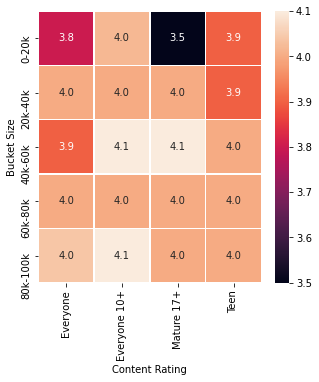

In [95]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

# ii.Greens color map

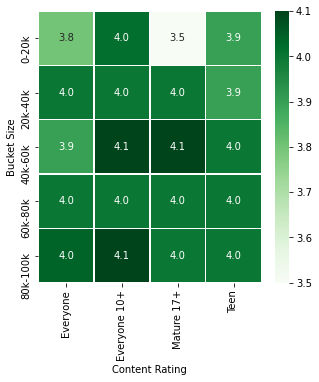

In [96]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.